# Data Processor

## Packages

We use three  different packages for preparation of our dataset for the analysis. For summary statistics and subseting our dataset, we make use of pandas package and we implement pyplot package for creating visualisation of the data. At one point, we also numpy to specify data type we want to show. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Summary Statistics


At first, we load the dataset and get the summary statistics for all the variables that we have in our data frame. We divide it into two parts. Firstly, we get the statistics for the variables with numerical values and in the seconds step we get it for the variables with string values. We use the function describe to get the summary statistics and transpose function, so the statistics are in rows and not in columns. 

In [2]:
mdata = pd.read_csv('raw_data.csv')
summary=mdata.describe(include=[np.number])
summary=summary.transpose()
print(summary)


                         count          mean           std        min  \
Hmotnost                 917.0  1.715783e+02  5.672086e+01     50.000   
Paměť RAM                832.0  4.200590e+03  3.053067e+03      4.000   
Modelový rok             434.0  2.018629e+03  2.565211e+00   2011.000   
Velikost displeje        979.0  5.117111e+00  1.686133e+00      1.530   
Jemnost displeje (PPI)   651.0  3.449432e+02  1.244262e+02     93.000   
Výška                    851.0  1.456463e+02  2.244081e+01     55.000   
Šířka                    844.0  6.982549e+01  1.041978e+01     43.000   
Hloubka                  841.0  1.056348e+01  3.442225e+00      6.500   
Rozlišení fotoaparátu    929.0  2.436566e+01  2.548371e+01      0.300   
Verze Bluetooth          818.0  4.327873e+00  9.651101e-01      2.000   
Kapacita baterie         927.0  3.418362e+03  1.868632e+03    400.000   
Frekvence procesoru      748.0  2.009357e+00  5.873881e-01      0.185   
Počet jader procesoru    774.0  6.005168e+00  2.639

In [3]:
summary2=mdata.describe(include=[object])
summary2=summary2.transpose()
summary2=summary2.sort_values(by=['count'],ascending=False)
pd.set_option('display.max_rows',None)
pd.set_option("max_colwidth", 20)
print(summary2)

                     count unique                  top freq
name                  1037   1037  Samsung Galaxy A...    1
Fotoaparát            1004      2                  ano  981
brand                  986     52              Samsung  126
Rozlišení displeje     982     80          2400 x 1080  155
Operační systém        945     10              Android  643
Bluetooth              944      2                  ano  933
GPS modul              937      2                  ano  778
Možnost paměťové ...   934      2                  ano  762
Konstrukce             926      4             dotykové  717
WiFi                   904      2                  ano  744
Typ displeje           870     19                  IPS  355
Jack 3,5               848      2                  ano  702
Dual SIM               841      2                  ano  618
LTE                    840      2                  ano  683
Typ nabíječky (ko...   835      4                USB-C  409
Typ SIM karty          832      5       

We can see that a number of variables is available only for quite small subset of mobile phones. That is not a problem at this point because we are interested only in mobile phones with  Android or iOS operating system. We check the number of mobile phones that have these two operating systems.

<AxesSubplot:>

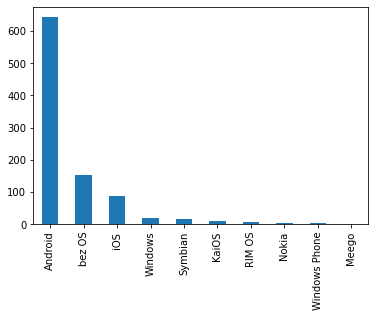

In [4]:
mdata["Operační systém"].value_counts().plot(kind='bar')

<AxesSubplot:>

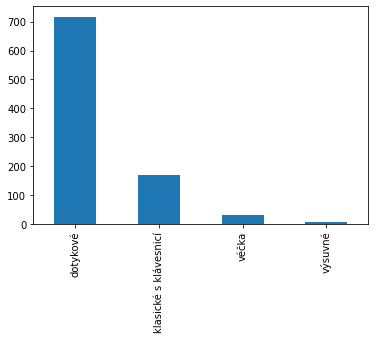

In [5]:
mdata["Konstrukce"].value_counts().plot(kind='bar')

## Filtering Data Frame
### System and Design
According to the plots, we should have around 700 hundred phones that fullfil our requirement, so in the next step we filter them out. There are some mobile phones with wrong information included on Heureka website that are said to have Android operating system, when they actually do not, so we additionaly filter them out by type of construction (Konstrukce). There are some mobile phones that are said to have buttons that actually have touchscreen and Android operating system, but they would be excluded in the next step, when we filter the mobile phones by the number of ratings, so we do not  unnecessarily loose any data by excluding them now. After filitering out the data, we are left with 680 values, which approximately matches the number of values according to the histogram.

In [6]:
obs1=mdata[(mdata["Operační systém"]=='Android')&(mdata["Konstrukce"]=='klasické s klávesnicí')]
print(obs1['name'],obs1['numberofratings'])
obs2=mdata[(mdata["Operační systém"]=='iOS')&(mdata["Konstrukce"]=='klasické s klávesnicí')]
print(obs2['name'])
mdata1=mdata[(mdata["Operační systém"]=='Android')|(mdata["Operační systém"]=='iOS')]
mdata2=mdata1[(mdata["Konstrukce"]=='dotykové')]
print(mdata2.shape[0])

201    OUKITEL WP12 4GB...
293      Umidigi Bison PRO
372       Oukitel K15 Plus
482    EVOLVEO EasyPhon...
511       Umidigi Bison GT
766    myPhone Hammer B...
802        Blaupunkt BS 04
895    Mobiola MB700 Se...
Name: name, dtype: object 201    3.0
293    1.0
372    1.0
482    0.0
511    3.0
766    0.0
802    2.0
895    2.0
Name: numberofratings, dtype: float64
Series([], Name: name, dtype: object)
680


C:\Users\jziac\AppData\Local\Temp/ipykernel_14048/3045324915.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mdata2=mdata1[(mdata["Konstrukce"]=='dotykové')]


### Number of Ratings
In the next step, we want to filter out the values by the number of their ratings on the heureka website. Our intuition behind is that the more ratings a mobile phone has the more accurately will the rating represent its quality in the eyes of the customers. We first plot a number of mobile phones by the number of ratings. We see that the number of ratings is under 100 for majority of them and more than a half has less than 20 ratings. Based on the distribution of number of ratings, we decided that our treshold will be 5 ratings in order for the mobile phone to be included in the analysis.  

over1000: 18
over100: 132


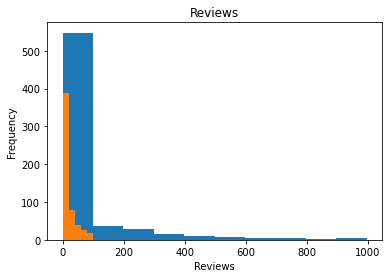

under20: 392


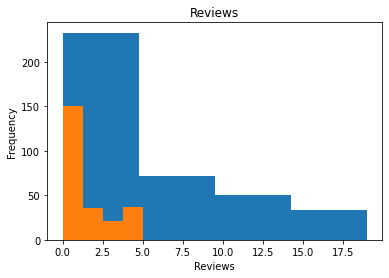

under5: 233
0ratings: 111


In [7]:
print("over1000:",mdata2['numberofratings'][(mdata2['numberofratings']>1000)].count())
plt.hist(mdata2['numberofratings'][(mdata2['numberofratings']<=1000)],bins=10)
plt.hist(mdata2['numberofratings'][(mdata2['numberofratings']<100)],bins=5)
print("over100:",mdata2['numberofratings'][(mdata2['numberofratings']>100)].count())
plt.title("Reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()
print("under20:",mdata2['numberofratings'][(mdata2['numberofratings']<=20)].count())
plt.hist(mdata2['numberofratings'][(mdata2['numberofratings']<20)],bins=4)
plt.hist(mdata2['numberofratings'][(mdata2['numberofratings']<=5)],bins=4)
plt.title("Reviews")
plt.xlabel("Reviews")
plt.ylabel("Frequency")
plt.show()
print("under5:",mdata2['numberofratings'][(mdata2['numberofratings']<5)].count())
print("0ratings:",mdata2['numberofratings'][(mdata2['numberofratings']==0)].count())
mdata3=mdata2[(mdata2['numberofratings']>=5)]

### Version of Operating System
We also filter out mobile phones for which the value of version of operating system (Verze operačního systému) is not available in the dataset, because we want to use this variable in our analysis. After filtering out the dataset we are left with 445 mobile phones in it. We run the summary statistics for all the variables again and we can see that values of all of the numerical variables are available for most of the mobile phones and for a much bigger number of string variables now.

In [8]:
mdata4=mdata3[mdata3["Verze operačního systému"].notna()]
print('nrows:',mdata4.shape[0])
summary3=mdata4.describe(include=[np.number])
summary3=summary3.transpose()
print(summary3)


nrows: 445
                      count          mean           std         min  \
Hmotnost              441.0  1.835254e+02  4.283237e+01       107.0   
Paměť RAM             444.0  4.328423e+03  2.543636e+03       320.0   
Modelový rok          342.0  2.018456e+03  2.622283e+00      2011.0   
Velikost displeje     445.0  5.824067e+00  8.257041e-01         3.5   
Jemnost displeje ...  404.0  3.800842e+02  1.165123e+02       187.0   
Výška                 434.0  1.527963e+02  1.392442e+01        74.2   
Šířka                 432.0  7.326750e+01  5.519562e+00        54.0   
Hloubka               430.0  9.060930e+00  2.254713e+00         6.5   
Rozlišení fotoapa...  445.0  2.841843e+01  2.525499e+01         3.0   
Verze Bluetooth       441.0  4.610204e+00  6.027288e-01         2.0   
Kapacita baterie      427.0  3.888852e+03  1.483358e+03      1305.0   
Frekvence procesoru   433.0  2.096744e+00  5.026387e-01         0.8   
Počet jader proce...  443.0  6.501129e+00  2.162384e+00         1.

In [9]:
summary4=mdata4.describe(include=[object])
summary4=summary4.transpose()
summary4=summary4.sort_values(by=['count'],ascending=False)
print(summary4)

                     count unique                  top freq
Konstrukce             445      1             dotykové  445
Bluetooth              445      1                  ano  445
Verze operačního ...   445     32           Android 10  115
Rozlišení displeje     445     49          2400 x 1080   77
name                   445    445  Samsung Galaxy A...    1
Fotoaparát             445      1                  ano  445
WiFi                   445      1                  ano  445
Operační systém        445      2              Android  364
GPS modul              444      1                  ano  444
brand                  444     31              Samsung   91
Typ SIM karty          442      4              nanoSIM  363
LTE                    441      2                  ano  418
Typ displeje           440     14                  IPS  215
Typ nabíječky (ko...   435      4                USB-C  238
Akcelerometr (G-s...   435      2                  ano  434
Blesk                  434      2       

### Final Adjustments
In the last step of the data selection, we filter out the rest of the columns that we will not use in our analysis. There are lot of variables that are not relevant for the smartphones. We got rid of most of them by deleting every column with index number greater than 66. We asessed the rest of the variables individually.

In [10]:
print(mdata4.columns)
print(mdata4.columns.get_loc('Odolné'))
mdata5=mdata4.iloc[:,0:67]

Index(['Konstrukce', 'Operační systém', 'Verze operačního systému', 'Hmotnost',
       'Možnost paměťové karty', 'Paměť RAM', 'Produktová řada',
       'Modelový rok', 'Velikost displeje', 'Rozlišení displeje',
       'Poměr stran displeje', 'Typ displeje', 'Jemnost displeje (PPI)',
       'Výška', 'Šířka', 'Hloubka', 'Fotoaparát', 'Rozlišení fotoaparátu',
       'Blesk', 'HD video', 'Přední kamera', 'Optická stabilizace obrazu',
       'Počet objektivů zadního fotoaparátu',
       'Počet objektivů předního fotoaparátu',
       'Světelnost objektivu hlavního fotoaparátu',
       'Světelnost objektivu předního fotoaparátu',
       'Maximální rozlišení videa', 'Jack 3,5', 'Voděodolný',
       'Snímač otisků prstů', 'Typ nabíječky (konektor)', 'USB On-The-Go',
       'Rychlonabíjení', 'Sluchátkový konektor', 'Verze Bluetooth',
       'Kapacita baterie', 'Frekvence procesoru', 'Počet jader procesoru',
       'Uživatelská paměť', 'Dual SIM', 'Akcelerometr (G-senzor)',
       'Gyroskopický s

In [11]:
summary5=mdata5.describe(include="all")[0:1]
summary5=summary5.transpose()
summary5['por'] = list(range(0,67))
print(summary5)
list2 = [[0,10,11,12,13,15,16,18,19,20,21,24,25,27,31,40,41,42,43,44,45,59,60,61,62,63,65]]
df = mdata5.drop(mdata5.columns[list2], axis=1)

                      count  por
Konstrukce              445    0
Operační systém         445    1
Verze operačního ...    445    2
Hmotnost              441.0    3
Možnost paměťové ...    423    4
Paměť RAM             444.0    5
Produktová řada         297    6
Modelový rok          342.0    7
Velikost displeje     445.0    8
Rozlišení displeje      445    9
Poměr stran displeje    397   10
Typ displeje            440   11
Jemnost displeje ...  404.0   12
Výška                 434.0   13
Šířka                 432.0   14
Hloubka               430.0   15
Fotoaparát              445   16
Rozlišení fotoapa...  445.0   17
Blesk                   434   18
HD video                402   19
Přední kamera           430   20
Optická stabiliza...    242   21
Počet objektivů z...    345   22
Počet objektivů p...    345   23
Světelnost objekt...    379   24
Světelnost objekt...    318   25
Maximální rozliše...    397   26
Jack 3,5                409   27
Voděodolný              200   28
Snímač oti

C:\Users\jziac\anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


## Transforming Variables

In the next stage, we created several cathegorical and dummy variables in the cases, where there was only several possible different values for the variable. 

### OS Year Variable
Before creating categorical variable for the version of operating system, we checked again if there are not OS versions in our dataframe that are wrongly assinged value Android or iOS. The we manually input release years for all the desired versions of OS and combined it into a dictionary with the corresponding OS versions. Then we used it with combination with map function to create variable for OS release year.

In [12]:
un_os = list(df["Verze operačního systému"].unique()) #unique values of version of OS in our dataset
bad_os=[]
for x in un_os: #if the version does not include words Android or iOS 
    if 'Android' not in x and 'iOS' not in x:
        un_os.remove(x)
        bad_os.append(x) #we append it to a list 
for x in bad_os: #we created subset of dataframe, where there are not values from the bad_os list 
    df=df[df["Verze operačního systému"]!=x] 
#we check if there are not Android phones assigned iOS version of a system and vica versa
result1 = df["Verze operačního systému"][(df["Operační systém"]=='Android')].str.contains(pat = 'iOS') 
result2 = df["Verze operačního systému"][(df["Operační systém"]=='iOS')].str.contains(pat = 'Android')
print("Android-veriOS: ",result1.unique())
print("iOS-verAndroid: ",result1.unique())

Android-veriOS:  [False]
iOS-verAndroid:  [False]


In [13]:
print(un_os)
#we manually put a release years for all OS in our dataset into a list, so the ranking matches the one in un_os list
list3 = [2020,2021,2019,2019,2020,2021,2018,2018,2017,2017,2017,2017,2019,2015,2017,2016,2010,2014,2016,2011,2014,2013,2013,2016,2012,2011,2012,2012,2010,2010,2012]
print(len(list3))
print(len(un_os))
map_year={}
for x in un_os: #we created a dictionary of OS version as keys and their release year as values
    for v in list3:
        map_year[x]=v
        list3.remove(v)
        break
print(map_year)
#we used the dicitonary and map function to assign release year to every row of our dataset
df["Year_Category"]=df["Verze operačního systému"].map(map_year)

['Android 11', 'iOS 15', 'Android 10', 'iOS 13', 'iOS 14', 'Android 12', 'Android 9.0 (Pie)', 'iOS 12', 'Android 8 Oreo (Go edition)', 'iOS 11', 'Android 8.0 (Oreo)', 'Android 8.1 (Oreo)', 'Android 10 GO', 'Android 6.0 (Marshmallow)', 'Android 8.1 Go', 'Android 7.0 (Nougat)', 'iOS 4', 'Android 5.0 (Lollipop)', 'iOS 10', 'iOS 5', 'Android 5.1 (Lollipop)', 'Android 4.4 (KitKat)', 'iOS 7', 'Android 7.1 (Nougat)', 'Android 4.2 (Jelly Bean)', 'Android 4.0 (Ice Cream Sandwich)', 'Android 4.1 (Jelly Bean)', 'iOS 6', 'Android 2.2 (Froyo)', 'Android 2.3 (Gingerbread)', 'Android 4.3 (Jelly Bean)']
31
31
{'Android 11': 2020, 'iOS 15': 2021, 'Android 10': 2019, 'iOS 13': 2019, 'iOS 14': 2020, 'Android 12': 2021, 'Android 9.0 (Pie)': 2018, 'iOS 12': 2018, 'Android 8 Oreo (Go edition)': 2017, 'iOS 11': 2017, 'Android 8.0 (Oreo)': 2017, 'Android 8.1 (Oreo)': 2017, 'Android 10 GO': 2019, 'Android 6.0 (Marshmallow)': 2015, 'Android 8.1 Go': 2017, 'Android 7.0 (Nougat)': 2016, 'iOS 4': 2010, 'Android 5.

###  OS Year Categorical Variable and Front Camere Lens

We began with dividing the years in which the operating system installed on the mobile phone was realeased into 3 variables from 0 to 2. The mobile phones with OS up to year 2013 are removed from the dataset, because demands fo the mobile phones can differ a lot from the demands for the new ones. We choose the year when the OS version was originally released rather than the release date of a mobile phone, because this data was not available for over 100 of the mobile phones. We created a function that transforms years 2014, 2015 and 2016 into a number 2, 2017,2018,2019 into 1 and 2020, 2021, 2022 into 0. We also created a function that transform in a similiar way number of front camera lenses into a cathegorical variable. We  presumed that if the mobile phone has at least 1 lens, there is a high probability that it will be mentioned on the webpage, so if there was a Na value we assigned it a same value as 0 lenses.

In [14]:
df3 = pd.DataFrame() #dataframe used to store variables used in the analysis
filter_list=[] #used to store already used variables
#we used the dicitonary and map function to assign release year to every row of our dataset 
print("numyearunder2015: ", df[(df['Year_Category']<2014)].shape[0])
df2 = df[df["Year_Category"]>=2014] #we filter out mobile phones that had release year lower than 2014
def veksk(rok):
    if (rok==2014 or rok==2015 or rok==2016):
        return 2
    elif (rok==2017 or rok==2018 or rok==2019):
        return 1
    else:
        return 0
#checking how many unique values of the variable there are in the dataset and its distribution
print('Počet objektivů předního fotoaparátu - unique values: ',df2['Počet objektivů předního fotoaparátu'].unique()) 
numberofobjectives=df2.groupby(['Počet objektivů předního fotoaparátu'],dropna=False).size()
print(numberofobjectives)
def selfie(obj):
    if obj=='2 objektivy':
        return 2
    elif obj=='1 objektiv':
        return 1
    else:
        return 0

numyearunder2015:  43
Počet objektivů předního fotoaparátu - unique values:  ['1 objektiv' '2 objektivy' nan]
Počet objektivů předního fotoaparátu
1 objektiv     326
2 objektivy     14
NaN             61
dtype: int64


In [15]:
#we applied the function veksk to transform years into a categorical variable
df3['Year_Category']=df2['Year_Category'].apply(veksk)
#comparing values from df2 to df3 to confirm that the function work as it should be
year_ch_1=df2.groupby(['Year_Category'],dropna=False).size()
year_ch_2=df3.groupby(['Year_Category'],dropna=False).size()
print(year_ch_1)
print(year_ch_2)
filter_list=filter_list+['Year_Category',"Verze operačního systému"]#used to filter out the variable later on

Year_Category
2014     25
2015     19
2016     23
2017     57
2018     50
2019    127
2020     90
2021     10
dtype: int64
Year_Category
0    100
1    234
2     67
dtype: int64


In the same way as we transformed release year of OS version into categorical variable, we transform number of front camera lenses into one, with the help of the function we defined previously.

In [16]:
#transforming the values of variable into categorical variable with our function and apply
df3['Počet objektivů předního fotoaparátu_cat'] = df2['Počet objektivů předního fotoaparátu'].apply(selfie)
#checking if the function works as it should
lenses=df3.groupby(['Počet objektivů předního fotoaparátu_cat'],dropna=False).size() 
print(numberofobjectives)
print(lenses)
filter_list.append('Počet objektivů předního fotoaparátu')#used to filter out the variable later on

Počet objektivů předního fotoaparátu
1 objektiv     326
2 objektivy     14
NaN             61
dtype: int64
Počet objektivů předního fotoaparátu_cat
0     61
1    326
2     14
dtype: int64



### Dummy Variables

We wrote several functions to transform several variables int dummy variables.The first function yesorno changes all the positions, where there is value yes to 1 and otherwise to 0. We based this decision on presumption that if the function that the variable describes is available in the mobile phone, it is with high probability mentioned among the mobile phone parameters, so if there is a missing value it probably means that the function is not available in the mobile phone. The second function USB-C transforms variable describing type of charging connector into dummy variable, where 1 stands for USB-C or Lightning types  and else 0.  The function os then attain value 1, when the mobile phone has iOs and 0, when it has Android OS. The last function sluch change values to 1 if there is 3,5mm Jack available on the mobile phone and 0 otherwise. 

In [17]:
#we add all of the variables on which the function yesno is used into a list
yesnoteam = ['Možnost paměťové karty','Voděodolný','Snímač otisků prstů','Rychlonabíjení', 'Dual SIM','NFC','LTE','5G','Odemykání obličejem','Odolné']
filter_list=filter_list+yesnoteam #used to filter out values later on
def yesorno(yes):
    if yes=='ano':
        return 1
    else:
        return 0

print("Typ nabíječky (konektor) - unique values: ", df2["Typ nabíječky (konektor)"].unique())#used to specify values in the function
typnab=df2.groupby(['Typ nabíječky (konektor)'],dropna=False).size()#checkign distribution of the values
print(typnab)
def usbC(yes):
    if yes=='USB-C' or yes=='Lightning' or yes=='lightning':
        return 1
    else:
        return 0
filter_list.append('Typ nabíječky (konektor)')
print("Operační systém - unique values: ", df2['Operační systém'].unique())
os3=df2.groupby(['Operační systém'],dropna=False).size()
print(os3)
def os(obj):
    if obj=='iOS':
        return 1
    else:
        return 0
filter_list.append('Operační systém')
print('Sluchátkový konektor - unique values: ', df2["Sluchátkový konektor"].unique())
headphonescon=df2.groupby(["Sluchátkový konektor","Typ nabíječky (konektor)"],dropna=False).size()
print(headphonescon)
def sluch(obj):
    if obj=='3,5mm Jack':
        return 1
    else:
        return 0
filter_list.append("Sluchátkový konektor")

Typ nabíječky (konektor) - unique values:  ['USB-C' nan 'micro USB' 'Lightning' 'lightning']
Typ nabíječky (konektor)
Lightning     51
USB-C        237
lightning     14
micro USB     93
NaN            6
dtype: int64
Operační systém - unique values:  ['Android' 'iOS']
Operační systém
Android    327
iOS         74
dtype: int64
Sluchátkový konektor - unique values:  ['3,5mm Jack' nan 'USB-C' 'Lightning' 'lightning']
Sluchátkový konektor  Typ nabíječky (konektor)
3,5mm Jack            Lightning                    21
                      USB-C                       163
                      micro USB                    91
                      NaN                           1
Lightning             Lightning                    24
USB-C                 USB-C                        53
lightning             Lightning                     6
                      lightning                    14
NaN                   USB-C                        21
                      micro USB                   

In [18]:
for stl in yesnoteam: #iterrating over all items in the yes not list
    df3[stl+"_d"] = df2[stl].apply(yesorno)
df3['Typ nabíječky_d'] = df2['Typ nabíječky (konektor)'].apply(usbC)
df3['Operační systém_d'] = df2['Operační systém'].apply(os)
df3['Sluchátkový konektor_d'] = df2['Sluchátkový konektor'].apply(sluch)
os4=df3.groupby(['Operační systém_d'],dropna=False).size()
typnab_2=df3.groupby(['Typ nabíječky_d'],dropna=False).size()
ppk=df2.groupby(['NFC'],dropna=False).size()
ppk_2=df3.groupby(['NFC_d'],dropna=False).size()
sluch_1=df2.groupby(["Sluchátkový konektor"],dropna=False).size()
sluch_2=df3.groupby(["Sluchátkový konektor_d"],dropna=False).size()
#checking if the functions tranform the variables in the right way
print(os3)
print(os4)
print(typnab)
print(typnab_2)
print(ppk)
print(ppk_2)
print(sluch_1)
print(sluch_2)

Operační systém
Android    327
iOS         74
dtype: int64
Operační systém_d
0    327
1     74
dtype: int64
Typ nabíječky (konektor)
Lightning     51
USB-C        237
lightning     14
micro USB     93
NaN            6
dtype: int64
Typ nabíječky_d
0     99
1    302
dtype: int64
NFC
ano    316
ne      42
NaN     43
dtype: int64
NFC_d
0     85
1    316
dtype: int64
Sluchátkový konektor
3,5mm Jack    276
Lightning      24
USB-C          53
lightning      20
NaN            28
dtype: int64
Sluchátkový konektor_d
0    125
1    276
dtype: int64


### Other Numeric and Categorical Variables 

For the variables for which there are more than 3 different  values in the dataset, we transformed the variables all at once. We began with filtering out the variables that we already tranformed and the variables that we do not use. Than we divided the filtered out variables in to two groups based on number of unique values that they attain. The variables with 20 or less unique values were put in to categorical group and the variables with more 20 unique values to the numeric group. Then we calculated sample average value for the numeric variables and sample mod for the categorical variables and replace the missing values in the dataset with them. After that we create dictionary of dictionaries, where keys of main dinctionary are names of the variables, keys of the value dictionary are sorted  unique values of an variable and the values are numbers ascending prime numbers. Than we use this dictionary to assign the numbers to the variables with the help of map function. 

In [19]:
print_col=set(df2.columns)-set(filter_list)#filtering out already used variables
print(print_col)
#filtering out variables that are not needed
print_col=print_col-{'offersBidded','name','priceMax','offersFree','brand','id','numberofratings','ratingH','priceMin','Modelový rok','Typ SIM karty','Produktová řada','Rozlišení displeje'}
for x in print_col: #printing unique values for all the variables
    print(x+": "+str(df2[x].unique())) 
    


{'Počet objektivů zadního fotoaparátu', 'Paměť RAM', 'Počet jader procesoru', 'Rozlišení displeje', 'ratingH', 'Verze Bluetooth', 'numberofratings', 'Produktová řada', 'Velikost displeje', 'offersFree', 'Uživatelská paměť', 'Rozlišení fotoaparátu', 'brand', 'Kapacita baterie', 'priceMin', 'priceMax', 'Maximální rozlišení videa', 'offersBidded', 'Šířka', 'Frekvence procesoru', 'Typ SIM karty', 'id', 'Hmotnost', 'Modelový rok', 'name'}
Počet objektivů zadního fotoaparátu: ['4 objektivy' '2 objektivy' '3 objektivy' '1 objektiv' nan]
Rozlišení fotoaparátu: [ 64.   48.   12.   13.  108.   50.   16.    8.   32.   21.   25.   23.
  20.   40.   20.7  24.    5.   19.   13.1  21.5]
Paměť RAM: [ 6144.  8192.  4096.  2048.  3072. 12288.  6000.  1024.    nan  4000.
  8000.  3000.  1536.]
Počet jader procesoru: [ 8.  6.  4.  2. nan]
Šířka: [75.1  76.8  71.5  76.68 76.4  77.07 67.3  64.2  75.7  73.9  74.5  76.5
 76.32 71.2  75.5  75.73 67.1  73.6  75.9  71.6  75.6  75.34 75.8  76.9
 78.1  72.2  75.3 

In [20]:
numeric=[]
categorical=[]
cat_dic={}
for x in print_col: #looking on the value distribution of all variables
    print(df2.groupby([x],dropna=False).size())
for x in print_col: #dividing variables int categorical and numeric
    if len(df2.groupby([x],dropna=False).size())<=20:
        categorical.append(x)
        cat_dic[x]=list(df2[x].unique())
    else:
        numeric.append(x)
print(categorical)
print(numeric)
print(cat_dic)

Počet objektivů zadního fotoaparátu
1 objektiv      65
2 objektivy     69
3 objektivy    110
4 objektivy    100
NaN             57
dtype: int64
Rozlišení fotoaparátu
5.0       3
8.0      29
12.0     89
13.0     66
13.1      1
16.0     34
19.0      6
20.0      5
20.7      4
21.0      2
21.5      1
23.0     11
24.0      2
25.0      2
32.0      1
40.0      1
48.0     71
50.0      8
64.0     47
108.0    18
dtype: int64
Paměť RAM
1024.0      17
1536.0       4
2048.0      54
3000.0       1
3072.0      63
4000.0       2
4096.0     121
6000.0       2
6144.0      69
8000.0       1
8192.0      54
12288.0     12
NaN          1
dtype: int64
Počet jader procesoru
2.0     25
4.0     50
6.0     50
8.0    275
NaN      1
dtype: int64
Šířka
58.00     2
58.60    10
63.00     1
64.20     5
64.70     1
64.90     2
65.00     3
65.20     1
65.50     2
65.70     1
66.50     1
67.00     5
67.10     8
67.30     6
68.00     1
68.10     1
68.50     1
68.70     1
69.00     1
69.10     1
69.20     1
69.30     1
69.

In [21]:
cat_mod_dic={}
num_avg_dic={}
df4=pd.DataFrame()
for x in categorical: #calculating mode and assigning it as a value to a dictionary, where keys are the variables names
    cat_mod_dic[x]=df2[x].mode()[0]
print(cat_mod_dic)    
for x in numeric: #calcualting average for numeric variables
    num_avg_dic[x]=df2[x].mean()
print(num_avg_dic)
fillna_dic=cat_mod_dic #merging numeric and categorical dictionaries
fillna_dic.update(num_avg_dic)
print(fillna_dic)
#filling in Na values in the dataset with modes and averages of the corresponding  variables
for  key,value in fillna_dic.items(): 
    print(key,value)
    df4[key]=df2[key].fillna(value)
print(df4.groupby(['Maximální rozlišení videa'],dropna=False).size())
print(df2.groupby(['Maximální rozlišení videa'],dropna=False).size())

{'Počet objektivů zadního fotoaparátu': '3 objektivy', 'Rozlišení fotoaparátu': 12.0, 'Paměť RAM': 4096.0, 'Počet jader procesoru': 8.0, 'Maximální rozlišení videa': '2160p (4K)', 'Uživatelská paměť': 128.0, 'Verze Bluetooth': 5.0}
{'Šířka': 73.88050377833751, 'Kapacita baterie': 4083.8198433420366, 'Frekvence procesoru': 2.1738560411311054, 'Velikost displeje': 5.964463840399004, 'Hmotnost': 187.86045340050384}
{'Počet objektivů zadního fotoaparátu': '3 objektivy', 'Rozlišení fotoaparátu': 12.0, 'Paměť RAM': 4096.0, 'Počet jader procesoru': 8.0, 'Maximální rozlišení videa': '2160p (4K)', 'Uživatelská paměť': 128.0, 'Verze Bluetooth': 5.0, 'Šířka': 73.88050377833751, 'Kapacita baterie': 4083.8198433420366, 'Frekvence procesoru': 2.1738560411311054, 'Velikost displeje': 5.964463840399004, 'Hmotnost': 187.86045340050384}
Počet objektivů zadního fotoaparátu 3 objektivy
Rozlišení fotoaparátu 12.0
Paměť RAM 4096.0
Počet jader procesoru 8.0
Maximální rozlišení videa 2160p (4K)
Uživatelská pa

In [22]:
for x in cat_dic.values(): #removing Na values from dictionary with unique values
    for v in x:
        if pd.isnull(v):
            x.remove(v)
    x.sort()
cat_dic['Maximální rozlišení videa']=['480p','720p (HD)','1080p (Full HD)','2160p (4K)','4320p (8K)']
print(cat_dic)

{'Počet objektivů zadního fotoaparátu': ['1 objektiv', '2 objektivy', '3 objektivy', '4 objektivy'], 'Rozlišení fotoaparátu': [5.0, 8.0, 12.0, 13.0, 13.1, 16.0, 19.0, 20.0, 20.7, 21.0, 21.5, 23.0, 24.0, 25.0, 32.0, 40.0, 48.0, 50.0, 64.0, 108.0], 'Paměť RAM': [1024.0, 1536.0, 2048.0, 3000.0, 3072.0, 4000.0, 4096.0, 6000.0, 6144.0, 8000.0, 8192.0, 12288.0], 'Počet jader procesoru': [2.0, 4.0, 6.0, 8.0], 'Maximální rozlišení videa': ['480p', '720p (HD)', '1080p (Full HD)', '2160p (4K)', '4320p (8K)'], 'Uživatelská paměť': [8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0], 'Verze Bluetooth': [3.0, 4.0, 4.1, 4.2, 5.0, 5.1, 5.2]}


In [23]:
cat_list=cat_dic.items() #creating list of an dictionary
print(cat_list)
list45=[]
#iterrating over unique values of variables (on the 1 position), each is assign consecutive prime number beginning with 0 
# and is assigned to an dictionary, which is in turned assigned to a list
for x in cat_list: 
    dic1={}
    i=0
    for v in x[1]:
        dic1[v]=i 
        i+=1
    list45.append(dic1) 
print(list45)
categorical2=categorical #we create copy of an list with the categorial variables
ult_dic={}
for x in list45: #each dictionary with unique values and numbers is assigned variable name as key
    for v in categorical2:
        ult_dic[v]=x
        categorical2.remove(v)
        break
print(ult_dic)
for key,value in ult_dic.items():
    df3[key+"_cat"]=df4[key].map(value)
#checking if the variable were created correctly
print(df3.groupby(['Počet objektivů zadního fotoaparátu_cat'],dropna=False).size())
print(df4.groupby(['Počet objektivů zadního fotoaparátu'],dropna=False).size())
print(df3.groupby(['Počet objektivů zadního fotoaparátu_cat'],dropna=False).size())
print(df4.groupby(['Počet objektivů zadního fotoaparátu'],dropna=False).size())    

dict_items([('Počet objektivů zadního fotoaparátu', ['1 objektiv', '2 objektivy', '3 objektivy', '4 objektivy']), ('Rozlišení fotoaparátu', [5.0, 8.0, 12.0, 13.0, 13.1, 16.0, 19.0, 20.0, 20.7, 21.0, 21.5, 23.0, 24.0, 25.0, 32.0, 40.0, 48.0, 50.0, 64.0, 108.0]), ('Paměť RAM', [1024.0, 1536.0, 2048.0, 3000.0, 3072.0, 4000.0, 4096.0, 6000.0, 6144.0, 8000.0, 8192.0, 12288.0]), ('Počet jader procesoru', [2.0, 4.0, 6.0, 8.0]), ('Maximální rozlišení videa', ['480p', '720p (HD)', '1080p (Full HD)', '2160p (4K)', '4320p (8K)']), ('Uživatelská paměť', [8.0, 16.0, 32.0, 64.0, 128.0, 256.0, 512.0]), ('Verze Bluetooth', [3.0, 4.0, 4.1, 4.2, 5.0, 5.1, 5.2])])
[{'1 objektiv': 0, '2 objektivy': 1, '3 objektivy': 2, '4 objektivy': 3}, {5.0: 0, 8.0: 1, 12.0: 2, 13.0: 3, 13.1: 4, 16.0: 5, 19.0: 6, 20.0: 7, 20.7: 8, 21.0: 9, 21.5: 10, 23.0: 11, 24.0: 12, 25.0: 13, 32.0: 14, 40.0: 15, 48.0: 16, 50.0: 17, 64.0: 18, 108.0: 19}, {1024.0: 0, 1536.0: 1, 2048.0: 2, 3000.0: 3, 3072.0: 4, 4000.0: 5, 4096.0: 6, 600

We assigned numeric variables to a newly created dataframe with the newly created variables that are used in the analysis. We also added two variables for which all values are available in the dataset. The first one is ratingH, which will be used as an dependend variable, the second one is price that we calculate as (minimal price + (0.25 * difference between minimal and maximal price)). We assume that people will not mostly buy the mobile phone from cheapest possible site but will find a cheapest offer from the more credible sites, where the price is usually a little bit higher.     

In [24]:
for x in numeric:
    df3[x+"_n"]=df4[x]
df3['RatingH']=df2['ratingH']
df2['price dif'] = df2['priceMax']-df2['priceMin']
df3['price']=df2['price dif'].quantile(0.25)+df2['priceMin']
df3["id"]=list(range(1,df3.shape[0]+1))
df3["Name"]=df2["name"]

C:\Users\jziac\AppData\Local\Temp/ipykernel_14048/3768581545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price dif'] = df2['priceMax']-df2['priceMin']


In the end we transfered the final dataset in the csv format. 

In [25]:
df3.to_csv('prepared_data.csv', index = None, header=True,encoding='utf-8')